# GRU


**Anggota Kelompok 5 :**
1. Jihan Husnia Utomo           (5026211019)
2. Nabilla Sabta Putri Pramesty (5026211043)
3. Annisa Mufidatun Sholihah    (5026211089)

# Import Library

In [ ]:
!pip install tensorflow

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn.metrics as sm
import tensorflow as tf
import seaborn as sns
import sklearn.preprocessing
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.callbacks import EarlyStopping #library utama untuk Machine Learning
from keras.layers import Dense,Dropout,SimpleRNN,LSTM,GRU
from keras.models import Sequential
from tensorflow import keras

# Preprocessing Data

In [ ]:
jatim = pd.read_csv('Jatim 2015 - 2022.csv')
jatim.head()

,datetime,total_visitor,total_accomodation
0,1/1/2014,16870,17382
1,2/1/2014,16476,17592
2,3/1/2014,18776,18192
3,4/1/2014,19145,18472
4,5/1/2014,20299,18790


In [ ]:
jatim.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   datetime            108 non-null    object
 1   total_visitor       108 non-null    int64 
 2   total_accomodation  108 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 2.7+ KB


In [ ]:
# check number of nan values in dataframe
jatim.isna().sum()

datetime              0
total_visitor         0
total_accomodation    0
dtype: int64

In [ ]:
#cek duplicates
duplicate_rows = jatim.duplicated().sum()
duplicate_rows

0

In [ ]:
jatim['datetime'] = pd.to_datetime(jatim['datetime'])
jatim.head()

,datetime,total_visitor,total_accomodation
0,2014-01-01,16870,17382
1,2014-02-01,16476,17592
2,2014-03-01,18776,18192
3,2014-04-01,19145,18472
4,2014-05-01,20299,18790


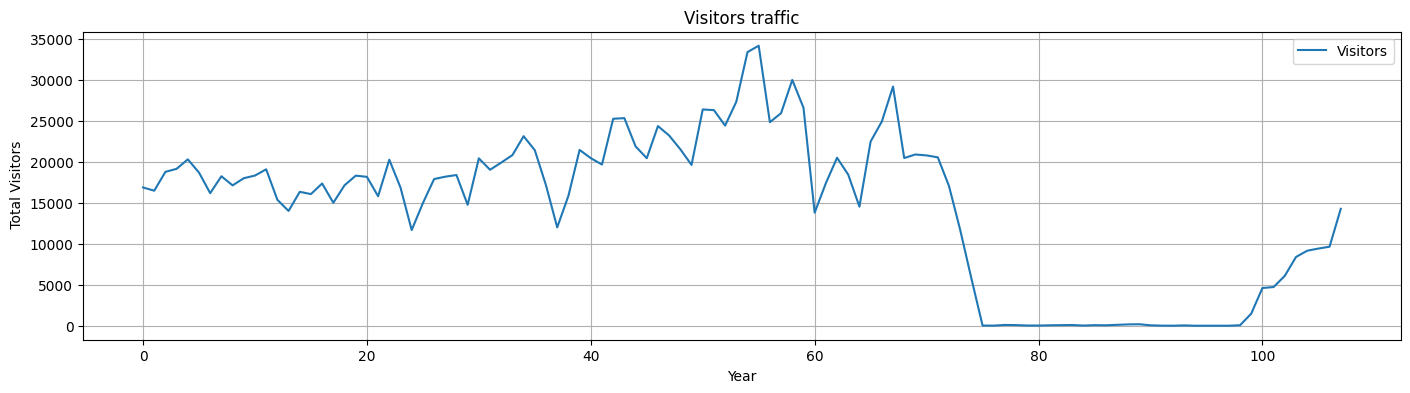

In [ ]:
# Plot the time series
plt.figure(figsize=(17, 4))
plt.plot(jatim['total_visitor'], label='Visitors')
plt.grid()
plt.xlabel('Year')
plt.ylabel(" Total Visitors")
plt.legend()
plt.title('Visitors traffic')
plt.show()

In [ ]:
jatim.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   datetime            108 non-null    datetime64[ns]
 1   total_visitor       108 non-null    int64         
 2   total_accomodation  108 non-null    int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 2.7 KB


In [ ]:
jatim

,datetime,total_visitor,total_accomodation
0,2014-01-01,16870,17382
1,2014-02-01,16476,17592
2,2014-03-01,18776,18192
3,2014-04-01,19145,18472
4,2014-05-01,20299,18790
...,...,...,...
103,2022-08-01,8386,58532
104,2022-09-01,9152,59224
105,2022-10-01,9415,59679
106,2022-11-01,9644,60021


## Prepare data for training

In [ ]:
#memisahkan kolom data untuk plotting kedepannya
train_dates = pd.to_datetime(jatim['datetime'])
print(train_dates.tail(24)) #Check last few dates.

84    2021-01-01
85    2021-02-01
86    2021-03-01
87    2021-04-01
88    2021-05-01
89    2021-06-01
90    2021-07-01
91    2021-08-01
92    2021-09-01
93    2021-10-01
94    2021-11-01
95    2021-12-01
96    2022-01-01
97    2022-02-01
98    2022-03-01
99    2022-04-01
100   2022-05-01
101   2022-06-01
102   2022-07-01
103   2022-08-01
104   2022-09-01
105   2022-10-01
106   2022-11-01
107   2022-12-01
Name: datetime, dtype: datetime64[ns]


In [ ]:
#membuat variabel untuk training
cols = list(jatim)[1:3]
print(cols)

['total_visitor', 'total_accomodation']


In [ ]:
# menyamakan tipe data
df_for_training = jatim[cols].astype(float)

In [ ]:
#scaler data
scaler = StandardScaler()
scaler = scaler.fit(df_for_training)
df_for_training_scaled = scaler.transform(df_for_training)

# Membangun Model Prediksi

### Skenario 1: 80% training : 20% testing

In [ ]:
train_size = int(0.8 * len(df_for_training_scaled))
X_train, y_train = df_for_training_scaled[:train_size], df_for_training_scaled[:train_size]
X_test, y_test = df_for_training_scaled[train_size:], df_for_training_scaled[train_size:]

X_train, y_train, X_test, y_test = np.array(X_train), np.array(y_train),np.array(X_test), np.array(y_test)

In [ ]:
print("Train X shape:", X_train.shape)
print("Train Y shape:", y_train.shape)
print("Test X shape:", X_test.shape)
print("Test Y shape:", y_test.shape)

Train X shape: (86, 2)
Train Y shape: (86, 2)
Test X shape: (22, 2)
Test Y shape: (22, 2)


In [ ]:
#cek apakah suda berbentuk array
y_test

array([[-1.53470377,  1.05349863],
       [-1.52870659,  1.10324225],
       [-1.52313778,  1.11604449],
       [-1.52088884,  1.13401389],
       [-1.53470377,  1.16123792],
       [-1.53920166,  1.17180362],
       [-1.5400584 ,  1.20882212],
       [-1.53631016,  1.23527493],
       [-1.54027258,  1.27908017],
       [-1.54027258,  1.31648429],
       [-1.54027258,  1.35088065],
       [-1.54027258,  1.3961512 ],
       [-1.53416831,  1.43733429],
       [-1.38306081,  1.48167938],
       [-1.04786132,  1.53612744],
       [-1.03458185,  1.56335147],
       [-0.88840061,  1.5898814 ],
       [-0.64219498,  1.63091025],
       [-0.56016213,  1.6842786 ],
       [-0.53199681,  1.71936906],
       [-0.50747263,  1.74574475],
       [-0.01270533,  2.60812176]])

In [ ]:
# Build the gru model
model = Sequential()
# First gru layer
model.add(GRU(64, activation='relu',input_shape=(X_train.shape[1], 1), return_sequences=True))
# Second gru layer
model.add(GRU(32, activation='relu'))
# Output layer
model.add(Dense(2))
#model.add(Dense(y_train.shape[0]))

model.compile(optimizer='adam', loss='mse')

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 2, 64)             12864     
                                                                 
 gru_1 (GRU)                 (None, 32)                9408      
                                                                 
 dense (Dense)               (None, 2)                 66        
                                                                 
Total params: 22338 (87.26 KB)
Trainable params: 22338 (87.26 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=64,
    validation_split=0.2,  # Use part of the training data as validation
    callbacks=[early_stopping]
)

Epoch 1/100
2/2 [==============================] - 4s 770ms/step - loss: 0.6979 - val_loss: 1.0894
Epoch 2/100
2/2 [==============================] - 0s 73ms/step - loss: 0.6759 - val_loss: 1.1135
Epoch 3/100
2/2 [==============================] - 0s 122ms/step - loss: 0.6556 - val_loss: 1.1387
Epoch 4/100
2/2 [==============================] - 0s 81ms/step - loss: 0.6360 - val_loss: 1.1642
Epoch 5/100
2/2 [==============================] - 0s 92ms/step - loss: 0.6174 - val_loss: 1.1887
Epoch 6/100
2/2 [==============================] - 0s 83ms/step - loss: 0.5998 - val_loss: 1.2134


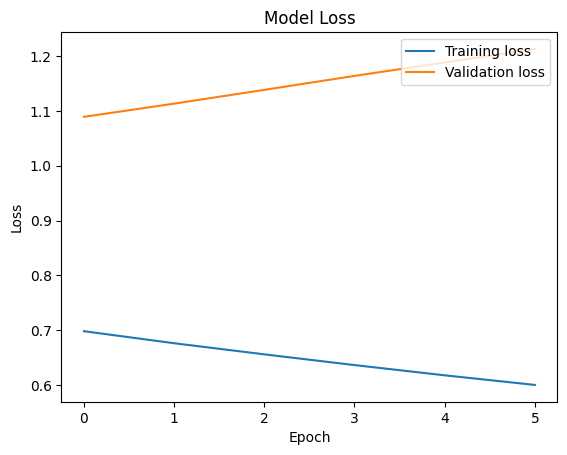

In [ ]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Training loss', 'Validation loss'], loc='upper right')
plt.show()

In [ ]:
from tabulate import tabulate

In [ ]:
# Retrieve loss values
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Create a table with loss values
loss_table = []

for epoch in range(len(train_loss)):
    loss_table.append([epoch+1, train_loss [epoch], val_loss [epoch]])

headers = ["Epoch", "Train Loss", "Validation Loss"]

# Print the loss table using tabulate
print(tabulate(loss_table, headers=headers, tablefmt='fancy_grid'))

╒═════════╤══════════════╤═══════════════════╕
│   Epoch │   Train Loss │   Validation Loss │
╞═════════╪══════════════╪═══════════════════╡
│       1 │     0.697913 │           1.08942 │
├─────────┼──────────────┼───────────────────┤
│       2 │     0.675939 │           1.1135  │
├─────────┼──────────────┼───────────────────┤
│       3 │     0.65563  │           1.13867 │
├─────────┼──────────────┼───────────────────┤
│       4 │     0.636037 │           1.16417 │
├─────────┼──────────────┼───────────────────┤
│       5 │     0.617352 │           1.18865 │
├─────────┼──────────────┼───────────────────┤
│       6 │     0.599796 │           1.21342 │
╘═════════╧══════════════╧═══════════════════╛


In [ ]:
# Make predictions on the test set
pred = model.predict(X_test)

print("shape:", pred.shape)

1/1 [==============================] - 1s 1s/step
shape: (22, 2)


In [ ]:
# Inverse transform the scaled predictions to original scale
y_pred = scaler.inverse_transform(pred)

In [ ]:
y_test = scaler.inverse_transform(y_test)

In [ ]:
y_pred = pd.DataFrame(y_pred, columns=['total_visitor','total_accomodation'])
y_pred

,total_visitor,total_accomodation
0,14687.313477,37409.699219
1,14691.820312,37403.335938
2,14692.707031,37401.085938
3,14694.333008,37398.757812
4,14697.972656,37397.792969
5,14699.327148,37397.285156
6,14703.060547,37393.261719
7,14705.434570,37389.714844
8,14710.065430,37385.335938
9,14713.795898,37381.054688


In [ ]:
y_test = pd.DataFrame(y_test, columns=['total_visitor','total_accomodation'])
y_test

,total_visitor,total_accomodation
0,52.0,51045.0
1,108.0,51690.0
2,160.0,51856.0
3,181.0,52089.0
4,52.0,52442.0
5,10.0,52579.0
6,2.0,53059.0
7,37.0,53402.0
8,0.0,53970.0
9,0.0,54455.0


In [ ]:
a = y_test['total_visitor']
b = y_pred['total_visitor']
c = a - b

hasil_model = {'data aktual': a, 'data prediksi': b, 'loss (perbedaan)': c}
hasil_model = pd.DataFrame(hasil_model)

hasil_model

,data aktual,data prediksi,loss (perbedaan)
0,52.0,14687.313477,-14635.313477
1,108.0,14691.820312,-14583.820312
2,160.0,14692.707031,-14532.707031
3,181.0,14694.333008,-14513.333008
4,52.0,14697.972656,-14645.972656
5,10.0,14699.327148,-14689.327148
6,2.0,14703.060547,-14701.060547
7,37.0,14705.434570,-14668.434570
8,0.0,14710.065430,-14710.065430
9,0.0,14713.795898,-14713.795898


In [ ]:
#calculate the accuration

gru_mse_1 =  round(sm.mean_squared_error(y_test, y_pred), 2)
gru_mae_1 = round(sm.mean_absolute_error(y_test, y_pred), 2)
gru_mape_1 = np.round(np.mean(np.abs((y_test) - y_pred )/y_test)*100,2)
gru_rmse_1 =  np.sqrt(mean_squared_error(y_test, y_pred)).round(2)

print("MSE:", gru_mse_1)
print("MAE:", gru_mae_1)
print("MAPE", gru_mape_1)
print("RMSE:",gru_rmse_1 )

MSE: 260089206.27
MAE: 15119.84
MAPE total_visitor           inf
total_accomodation    32.95
dtype: float64
RMSE: 16127.28


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [ ]:
eror = pd.DataFrame({'Method':['MSE', 'MAE', 'MAPE', 'RMSE'],
                     'Eror': [gru_mse_1,gru_mae_1,gru_mape_1, gru_rmse_1]})

eror = eror[['Method', 'Eror' ]]
eror

,Method,Eror
0,MSE,260089206.27
1,MAE,15119.84
2,MAPE,total_visitor inf total_accomodation...
3,RMSE,16127.28


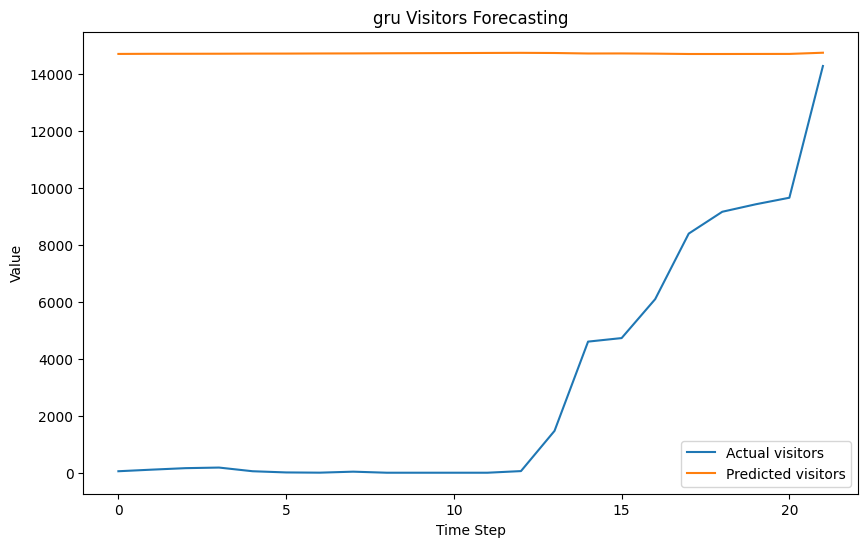

In [ ]:
# Plot the results for both targets (humidity and temperature)
plt.figure(figsize=(10, 6))

plt.plot(y_test['total_visitor'], label='Actual visitors')
plt.plot(y_pred['total_visitor'], label='Predicted visitors')

plt.title('gru Visitors Forecasting')
plt.xlabel('Time Step')
plt.ylabel('Value')
plt.legend()

plt.show()

In [ ]:
n_past = 1
n_month_for_prediction = 12
predict_period_month = pd.date_range(list(train_dates)[-n_past],
                                     periods=n_month_for_prediction, freq='M').tolist()
print(predict_period_month)

[Timestamp('2022-12-31 00:00:00', freq='M'), Timestamp('2023-01-31 00:00:00', freq='M'), Timestamp('2023-02-28 00:00:00', freq='M'), Timestamp('2023-03-31 00:00:00', freq='M'), Timestamp('2023-04-30 00:00:00', freq='M'), Timestamp('2023-05-31 00:00:00', freq='M'), Timestamp('2023-06-30 00:00:00', freq='M'), Timestamp('2023-07-31 00:00:00', freq='M'), Timestamp('2023-08-31 00:00:00', freq='M'), Timestamp('2023-09-30 00:00:00', freq='M'), Timestamp('2023-10-31 00:00:00', freq='M'), Timestamp('2023-11-30 00:00:00', freq='M')]


In [ ]:
prediction = model.predict(X_train[-n_month_for_prediction:])

1/1 [==============================] - 0s 55ms/step


In [ ]:
prediction

array([[ 0.0233235 , -0.00142029],
       [ 0.02830319,  0.00545909],
       [ 0.02871801,  0.00513762],
       [ 0.02903762,  0.00471218],
       [ 0.02950126,  0.00436877],
       [ 0.0300819 ,  0.00398525],
       [ 0.03024776,  0.0038543 ],
       [ 0.03060694,  0.00351037],
       [ 0.03089938,  0.00325145],
       [ 0.03146144,  0.0027818 ],
       [ 0.03203552,  0.00244927],
       [ 0.03233482,  0.00212084]], dtype=float32)

In [ ]:
#mengambil kolom total visitor saja
prediction = scaler.inverse_transform(prediction)[:,0]
prediction

array([14600.428, 14646.927, 14650.8  , 14653.784, 14658.113, 14663.535,
       14665.084, 14668.438, 14671.169, 14676.417, 14681.777, 14684.572],
      dtype=float32)

<ipython-input-37-83ffc4332b4e>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  original['datetime'] = pd.to_datetime(original['datetime'])


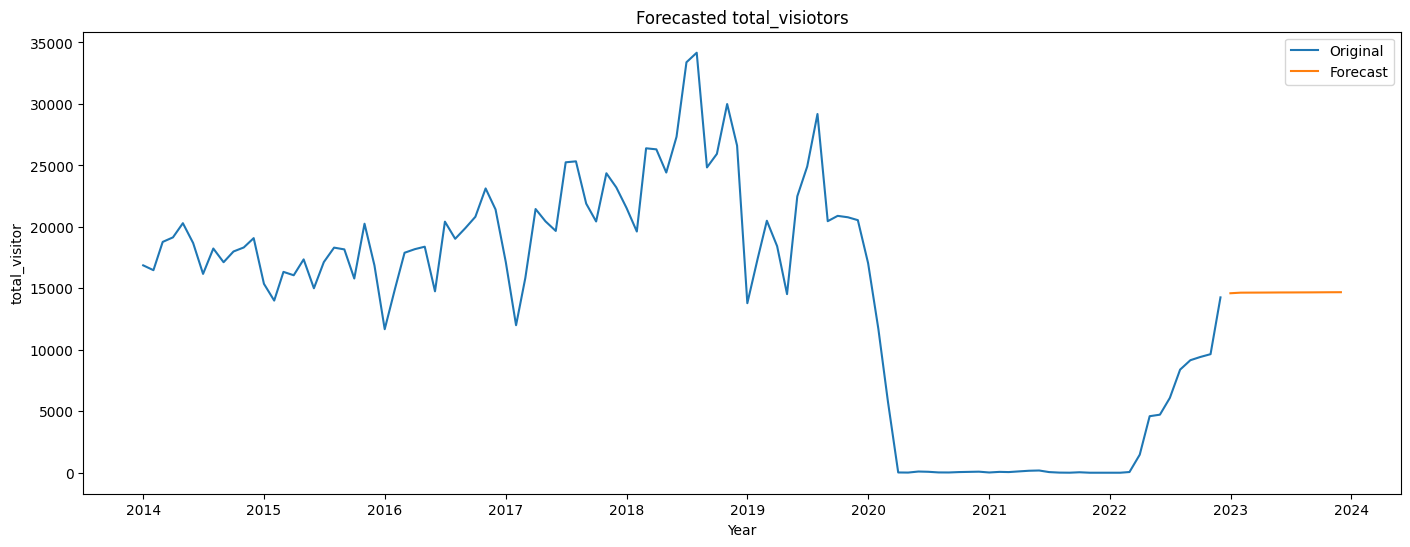

In [ ]:
forecast_dates = []

for time_i in predict_period_month:
    forecast_dates.append(time_i.date())

df_forecast = pd.DataFrame({'Date': forecast_dates, 'total_visitor': prediction})
df_forecast['Date'] = pd.to_datetime(df_forecast['Date'])

# Assuming 'original' contains the original data with 'Datetime' and 'jumlah_penderita' columns
original = jatim[['datetime','total_visitor']]
original['datetime'] = pd.to_datetime(original['datetime'])
original = original.loc[original['datetime'] >= '2013-01-01']


#Plot
plt.figure(figsize=(17, 6))
sns.lineplot(data=original, x='datetime', y='total_visitor', label='Original')
sns.lineplot(data=df_forecast, x='Date', y='total_visitor', label='Forecast')
plt.xlabel('Year')
plt.ylabel('total_visitor')
plt.title('Forecasted total_visiotors')
plt.legend()
plt.show()

# Generate the forecast dates from January 2023 to December 2023
forecast_dates_1 = pd.date_range(start='2023-01-01', end='2023-12-01', freq='MS')

# Create a list of forecast dates and prediction values
data = list(zip(forecast_dates_1, prediction))

In [ ]:
from tabulate import tabulate

In [ ]:
# Create a list of headers for the table
headers = ['Date', 'Prediction 1']
table = tabulate(data, headers=headers, tablefmt='fancy_grid')
# Print the table
print(table)

╒═════════════════════╤════════════════╕
│ Date                │   Prediction 1 │
╞═════════════════════╪════════════════╡
│ 2023-01-01 00:00:00 │        14600.4 │
├─────────────────────┼────────────────┤
│ 2023-02-01 00:00:00 │        14646.9 │
├─────────────────────┼────────────────┤
│ 2023-03-01 00:00:00 │        14650.8 │
├─────────────────────┼────────────────┤
│ 2023-04-01 00:00:00 │        14653.8 │
├─────────────────────┼────────────────┤
│ 2023-05-01 00:00:00 │        14658.1 │
├─────────────────────┼────────────────┤
│ 2023-06-01 00:00:00 │        14663.5 │
├─────────────────────┼────────────────┤
│ 2023-07-01 00:00:00 │        14665.1 │
├─────────────────────┼────────────────┤
│ 2023-08-01 00:00:00 │        14668.4 │
├─────────────────────┼────────────────┤
│ 2023-09-01 00:00:00 │        14671.2 │
├─────────────────────┼────────────────┤
│ 2023-10-01 00:00:00 │        14676.4 │
├─────────────────────┼────────────────┤
│ 2023-11-01 00:00:00 │        14681.8 │
├───────────────

### **Skenario 2: 70% training : 30% testing**

In [ ]:
train_size = int(0.7 * len(df_for_training_scaled))
X_train2, y_train2 = df_for_training_scaled[:train_size], df_for_training_scaled[:train_size]
X_test2, y_test2 = df_for_training_scaled[train_size:], df_for_training_scaled[train_size:]

X_train2, y_train2, X_test2, y_test2 = np.array(X_train2), np.array(y_train2),np.array(X_test2), np.array(y_test2)

In [ ]:
print("Train X shape:", X_train2.shape)
print("Train Y shape:", y_train2.shape)
print("Test X shape:", X_test2.shape)
print("Test Y shape:", y_test2.shape)

Train X shape: (75, 2)
Train Y shape: (75, 2)
Test X shape: (33, 2)
Test Y shape: (33, 2)


In [ ]:
#cek apakah suda berbentuk array
y_test2

array([[-1.53802364,  0.63758026],
       [-1.53898747,  0.67722091],
       [-1.52988461,  0.71447079],
       [-1.53213355,  0.75742768],
       [-1.53770236,  0.80917647],
       [-1.53813073,  0.8247551 ],
       [-1.53470377,  0.86146512],
       [-1.5328832 ,  0.89061719],
       [-1.53116972,  0.94529662],
       [-1.53813073,  0.99496311],
       [-1.5328832 ,  1.0269687 ],
       [-1.53470377,  1.05349863],
       [-1.52870659,  1.10324225],
       [-1.52313778,  1.11604449],
       [-1.52088884,  1.13401389],
       [-1.53470377,  1.16123792],
       [-1.53920166,  1.17180362],
       [-1.5400584 ,  1.20882212],
       [-1.53631016,  1.23527493],
       [-1.54027258,  1.27908017],
       [-1.54027258,  1.31648429],
       [-1.54027258,  1.35088065],
       [-1.54027258,  1.3961512 ],
       [-1.53416831,  1.43733429],
       [-1.38306081,  1.48167938],
       [-1.04786132,  1.53612744],
       [-1.03458185,  1.56335147],
       [-0.88840061,  1.5898814 ],
       [-0.64219498,

In [ ]:
# Build the gru model
model2 = Sequential()
# First gru layer
model2.add(GRU(64, activation='relu',input_shape=(X_train2.shape[1], 1), return_sequences=True))
# Second gru layer
model2.add(GRU(32, activation='relu'))
# Output layer
model2.add(Dense(2))


model2.compile(optimizer='adam', loss='mse')

In [ ]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_2 (GRU)                 (None, 2, 64)             12864     
                                                                 
 gru_3 (GRU)                 (None, 32)                9408      
                                                                 
 dense_1 (Dense)             (None, 2)                 66        
                                                                 
Total params: 22338 (87.26 KB)
Trainable params: 22338 (87.26 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = model2.fit(
    X_train2, y_train2,
    epochs=100,
    batch_size=64,
    validation_split=0.2,  # Use part of the training data as validation
    callbacks=[early_stopping]
)

Epoch 1/100
1/1 [==============================] - 7s 7s/step - loss: 0.7133 - val_loss: 0.3274
Epoch 2/100
1/1 [==============================] - 0s 100ms/step - loss: 0.7028 - val_loss: 0.3236
Epoch 3/100
1/1 [==============================] - 0s 113ms/step - loss: 0.6927 - val_loss: 0.3194
Epoch 4/100
1/1 [==============================] - 0s 112ms/step - loss: 0.6829 - val_loss: 0.3154
Epoch 5/100
1/1 [==============================] - 0s 94ms/step - loss: 0.6734 - val_loss: 0.3117
Epoch 6/100
1/1 [==============================] - 0s 99ms/step - loss: 0.6645 - val_loss: 0.3078
Epoch 7/100
1/1 [==============================] - 0s 179ms/step - loss: 0.6557 - val_loss: 0.3037
Epoch 8/100
1/1 [==============================] - 0s 132ms/step - loss: 0.6468 - val_loss: 0.2996
Epoch 9/100
1/1 [==============================] - 0s 100ms/step - loss: 0.6376 - val_loss: 0.2954
Epoch 10/100
1/1 [==============================] - 0s 132ms/step - loss: 0.6280 - val_loss: 0.2913
Epoch 11/100
1

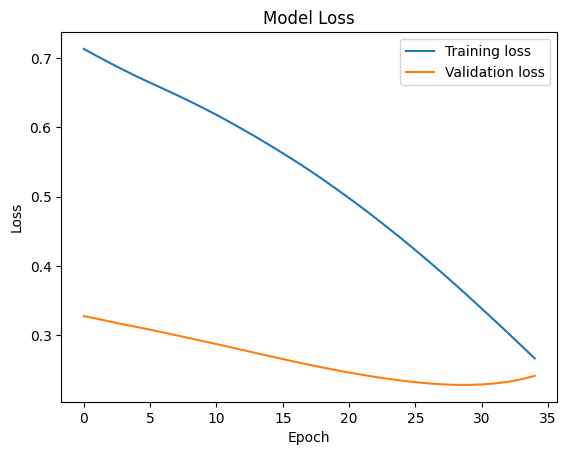

In [ ]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Training loss', 'Validation loss'], loc='upper right')
plt.show()

In [ ]:
# Retrieve loss values
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Create a table with loss values
loss_table = []

for epoch in range(len(train_loss)):
    loss_table.append([epoch+1, train_loss [epoch], val_loss [epoch]])

headers = ["Epoch", "Train Loss", "Validation Loss"]

# Print the loss table using tabulate
print(tabulate(loss_table, headers=headers, tablefmt='fancy_grid'))

╒═════════╤══════════════╤═══════════════════╕
│   Epoch │   Train Loss │   Validation Loss │
╞═════════╪══════════════╪═══════════════════╡
│       1 │     0.713292 │          0.327359 │
├─────────┼──────────────┼───────────────────┤
│       2 │     0.702844 │          0.32359  │
├─────────┼──────────────┼───────────────────┤
│       3 │     0.692669 │          0.319446 │
├─────────┼──────────────┼───────────────────┤
│       4 │     0.68287  │          0.315445 │
├─────────┼──────────────┼───────────────────┤
│       5 │     0.673432 │          0.311686 │
├─────────┼──────────────┼───────────────────┤
│       6 │     0.664457 │          0.30777  │
├─────────┼──────────────┼───────────────────┤
│       7 │     0.655692 │          0.303726 │
├─────────┼──────────────┼───────────────────┤
│       8 │     0.646768 │          0.299602 │
├─────────┼──────────────┼───────────────────┤
│       9 │     0.637553 │          0.295427 │
├─────────┼──────────────┼───────────────────┤
│      10 │  

In [ ]:
# Make predictions on the test set
pred2 = model2.predict(X_test2)

print("shape:", pred2.shape)

2/2 [==============================] - 1s 12ms/step
shape: (33, 2)


In [ ]:
# Inverse transform the scaled predictions to original scale
y_pred2 = scaler.inverse_transform(pred2)

In [ ]:
y_test2 = scaler.inverse_transform(y_test2)

In [ ]:
y_pred2 = pd.DataFrame(y_pred2, columns=['total_visitor','total_accomodation'])
y_pred2

,total_visitor,total_accomodation
0,16303.232422,33466.800781
1,16378.056641,33495.242188
2,16454.494141,33539.023438
3,16535.001953,33566.308594
4,16630.511719,33592.234375
5,16660.115234,33602.210938
6,16732.921875,33633.097656
7,16788.765625,33653.109375
8,16892.335938,33682.273438
9,16981.169922,33693.875000


In [ ]:
y_test2 = pd.DataFrame(y_test2, columns=['total_visitor','total_accomodation'])
y_test2

,total_visitor,total_accomodation
0,21.0,45652.0
1,12.0,46166.0
2,97.0,46649.0
3,76.0,47206.0
4,24.0,47877.0
5,20.0,48079.0
6,52.0,48555.0
7,69.0,48933.0
8,85.0,49642.0
9,20.0,50286.0


In [ ]:
a = y_test2['total_visitor']
b = y_pred2['total_visitor']
c = a - b

hasil_model2 = {'data aktual': a, 'data prediksi': b, 'loss (perbedaan)': c}
hasil_model2 = pd.DataFrame(hasil_model2)

hasil_model2

,data aktual,data prediksi,loss (perbedaan)
0,21.0,16303.232422,-16282.232422
1,12.0,16378.056641,-16366.056641
2,97.0,16454.494141,-16357.494141
3,76.0,16535.001953,-16459.001953
4,24.0,16630.511719,-16606.511719
5,20.0,16660.115234,-16640.115234
6,52.0,16732.921875,-16680.921875
7,69.0,16788.765625,-16719.765625
8,85.0,16892.335938,-16807.335938
9,20.0,16981.169922,-16961.169922


In [ ]:
#calculate the accuration

gru_mse_2 =  round(sm.mean_squared_error(y_test2, y_pred2), 2)
gru_mae_2 = round(sm.mean_absolute_error(y_test2, y_pred2), 2)
gru_mape_2 = np.round(np.mean(np.abs((y_test2) - y_pred2 )/y_test2)*100,2)
gru_rmse_2 =  np.sqrt(mean_squared_error(y_test2, y_pred2)).round(2)

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [ ]:
eror2 = pd.DataFrame({'Method':['MSE', 'MAE', 'MAPE', 'RMSE'], 'Eror': [gru_mse_2,gru_mae_2,gru_mape_2, gru_rmse_2]})

eror2 = eror2[['Method', 'Eror' ]]
eror2

,Method,Eror
0,MSE,319835399.19
1,MAE,17372.3
2,MAPE,total_visitor inf total_accomodation...
3,RMSE,17883.94


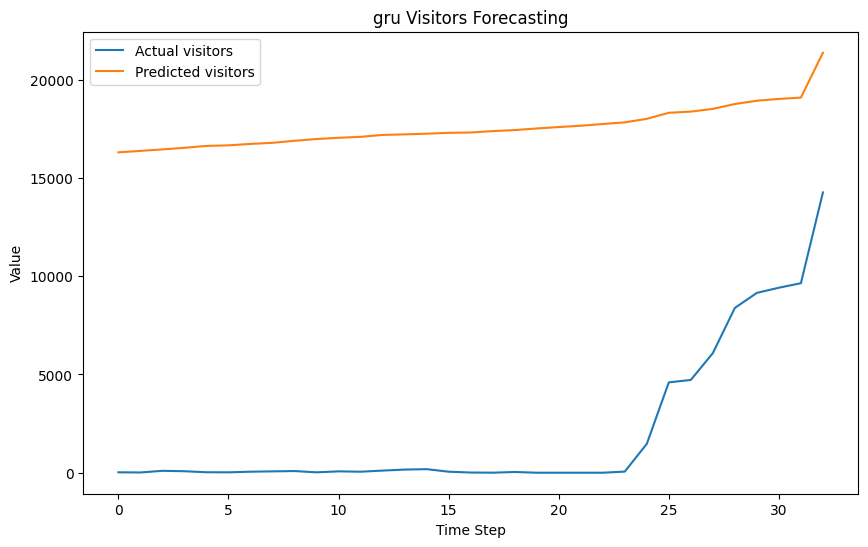

In [ ]:
# Plot the results for both targets (humidity and temperature)
plt.figure(figsize=(10, 6))

plt.plot(y_test2['total_visitor'], label='Actual visitors')
plt.plot(y_pred2['total_visitor'], label='Predicted visitors')

plt.title('gru Visitors Forecasting')
plt.xlabel('Time Step')
plt.ylabel('Value')
plt.legend()

plt.show()

In [ ]:
n_past = 1
n_month_for_prediction2 = 12
predict_period_month = pd.date_range(list(train_dates)[-n_past],
                                     periods=n_month_for_prediction2, freq='M').tolist()
print(predict_period_month)

[Timestamp('2022-12-31 00:00:00', freq='M'), Timestamp('2023-01-31 00:00:00', freq='M'), Timestamp('2023-02-28 00:00:00', freq='M'), Timestamp('2023-03-31 00:00:00', freq='M'), Timestamp('2023-04-30 00:00:00', freq='M'), Timestamp('2023-05-31 00:00:00', freq='M'), Timestamp('2023-06-30 00:00:00', freq='M'), Timestamp('2023-07-31 00:00:00', freq='M'), Timestamp('2023-08-31 00:00:00', freq='M'), Timestamp('2023-09-30 00:00:00', freq='M'), Timestamp('2023-10-31 00:00:00', freq='M'), Timestamp('2023-11-30 00:00:00', freq='M')]


In [ ]:
prediction2 = model2.predict(X_train2[-n_month_for_prediction2:])

1/1 [==============================] - 0s 37ms/step


In [ ]:
prediction2

array([[ 0.3997833 , -0.09015871],
       [ 0.3049237 , -0.12773834],
       [ 0.5239519 , -0.06970419],
       [ 0.5941692 , -0.06505553],
       [ 0.72035944, -0.05929411],
       [ 0.47977513, -0.07121034],
       [ 0.49745324, -0.06871232],
       [ 0.49583572, -0.06862143],
       [ 0.49249896, -0.06845357],
       [ 0.409191  , -0.08257234],
       [ 0.29027033, -0.14531675],
       [ 0.23918037, -0.22332458]], dtype=float32)

In [ ]:
#mengambil kolom total visitor saja
prediction2 = scaler.inverse_transform(prediction2)[:,0]
prediction2

array([18115.705, 17229.932, 19275.156, 19930.826, 21109.156, 18862.646,
       19027.719, 19012.615, 18981.457, 18203.55 , 17093.104, 16616.04 ],
      dtype=float32)

<ipython-input-61-7660ff4a0177>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  original['datetime'] = pd.to_datetime(original['datetime'])


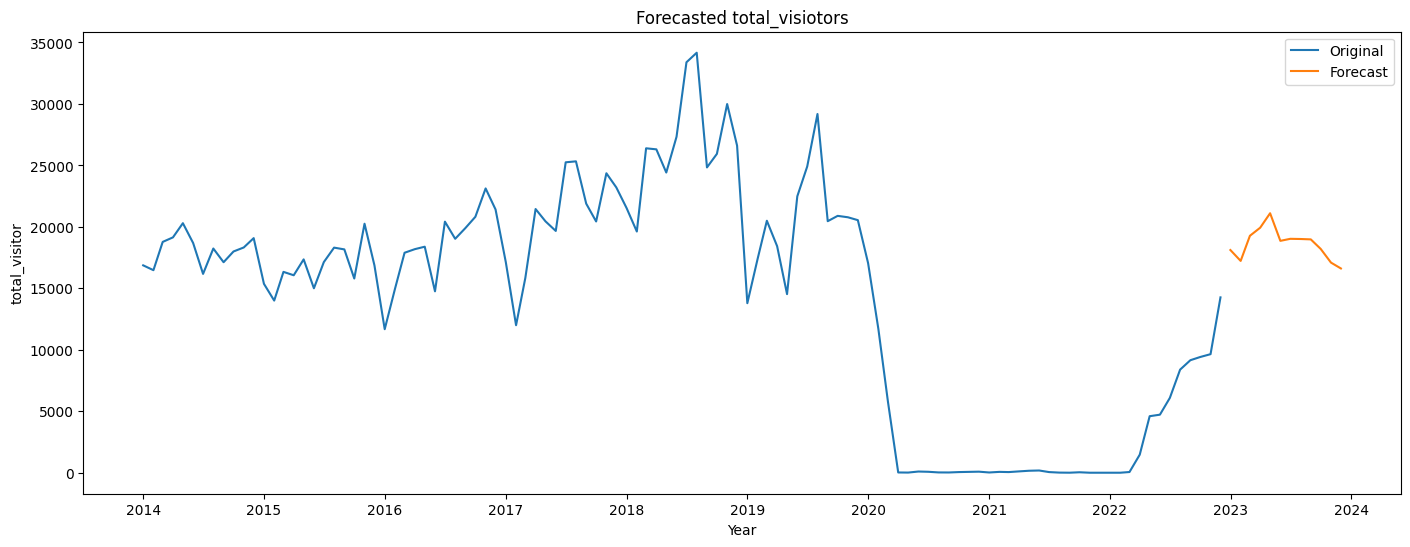

In [ ]:
forecast_dates = []

for time_i in predict_period_month:
    forecast_dates.append(time_i.date())

df_forecast = pd.DataFrame({'Date': forecast_dates, 'total_visitor': prediction2})
df_forecast['Date'] = pd.to_datetime(df_forecast['Date'])

# Assuming 'original' contains the original data with 'Datetime' and 'jumlah_penderita' columns
original = jatim[['datetime','total_visitor']]
original['datetime'] = pd.to_datetime(original['datetime'])
original = original.loc[original['datetime'] >= '2013-01-01']


#Plot
plt.figure(figsize=(17, 6))
sns.lineplot(data=original, x='datetime', y='total_visitor', label='Original')
sns.lineplot(data=df_forecast, x='Date', y='total_visitor', label='Forecast')
plt.xlabel('Year')
plt.ylabel('total_visitor')
plt.title('Forecasted total_visiotors')
plt.legend()
plt.show()

# Generate the forecast dates from January 2023 to December 2023
forecast_dates_1 = pd.date_range(start='2023-01-01', end='2023-12-01', freq='MS')

# Create a list of forecast dates and prediction values
data = list(zip(forecast_dates_1, prediction2))

In [ ]:
from tabulate import tabulate

In [ ]:
# Create a list of headers for the table
headers = ['Date', 'Prediction 2']
table = tabulate(data, headers=headers, tablefmt='fancy_grid')
# Print the table
print(table)

╒═════════════════════╤════════════════╕
│ Date                │   Prediction 2 │
╞═════════════════════╪════════════════╡
│ 2023-01-01 00:00:00 │        18115.7 │
├─────────────────────┼────────────────┤
│ 2023-02-01 00:00:00 │        17229.9 │
├─────────────────────┼────────────────┤
│ 2023-03-01 00:00:00 │        19275.2 │
├─────────────────────┼────────────────┤
│ 2023-04-01 00:00:00 │        19930.8 │
├─────────────────────┼────────────────┤
│ 2023-05-01 00:00:00 │        21109.2 │
├─────────────────────┼────────────────┤
│ 2023-06-01 00:00:00 │        18862.6 │
├─────────────────────┼────────────────┤
│ 2023-07-01 00:00:00 │        19027.7 │
├─────────────────────┼────────────────┤
│ 2023-08-01 00:00:00 │        19012.6 │
├─────────────────────┼────────────────┤
│ 2023-09-01 00:00:00 │        18981.5 │
├─────────────────────┼────────────────┤
│ 2023-10-01 00:00:00 │        18203.6 │
├─────────────────────┼────────────────┤
│ 2023-11-01 00:00:00 │        17093.1 │
├───────────────

### Skenario 3: 60% training : 40% testing

In [ ]:
train_size = int(0.6 * len(df_for_training_scaled))
X_train3, y_train3 = df_for_training_scaled[:train_size], df_for_training_scaled[:train_size]
X_test3, y_test3 = df_for_training_scaled[train_size:], df_for_training_scaled[train_size:]

X_train3, y_train3, X_test3, y_test3 = np.array(X_train3), np.array(y_train3),np.array(X_test3), np.array(y_test3)

In [ ]:
print("Train X shape:", X_train3.shape)
print("Train Y shape:", y_train3.shape)
print("Test X shape:", X_test3.shape)
print("Test Y shape:", y_test3.shape)

Train X shape: (64, 2)
Train Y shape: (64, 2)
Test X shape: (44, 2)
Test Y shape: (44, 2)


In [ ]:
#cek apakah suda berbentuk array
y_test3

array([[ 0.01567418,  0.29107159],
       [ 0.86770201,  0.32693327],
       [ 1.12772257,  0.34929862],
       [ 1.58468622,  0.38600864],
       [ 0.65105391,  0.40999355],
       [ 0.69742495,  0.45179362],
       [ 0.68510932,  0.4615881 ],
       [ 0.66004968,  0.48109994],
       [ 0.28533306,  0.53331146],
       [-0.28729047,  0.54495687],
       [-0.92192056,  0.59547171],
       [-1.53802364,  0.63758026],
       [-1.53898747,  0.67722091],
       [-1.52988461,  0.71447079],
       [-1.53213355,  0.75742768],
       [-1.53770236,  0.80917647],
       [-1.53813073,  0.8247551 ],
       [-1.53470377,  0.86146512],
       [-1.5328832 ,  0.89061719],
       [-1.53116972,  0.94529662],
       [-1.53813073,  0.99496311],
       [-1.5328832 ,  1.0269687 ],
       [-1.53470377,  1.05349863],
       [-1.52870659,  1.10324225],
       [-1.52313778,  1.11604449],
       [-1.52088884,  1.13401389],
       [-1.53470377,  1.16123792],
       [-1.53920166,  1.17180362],
       [-1.5400584 ,

In [ ]:
# Build the gru model
model3 = Sequential()
# First gru layer
model3.add(GRU(64, activation='relu',input_shape=(X_train3.shape[1], 1), return_sequences=True))
# Second gru layer
model3.add(GRU(32, activation='relu'))
# Output layer
model3.add(Dense(2))
#model.add(Dense(y_train.shape[0]))

model3.compile(optimizer='adam', loss='mse')

In [ ]:
model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_4 (GRU)                 (None, 2, 64)             12864     
                                                                 
 gru_5 (GRU)                 (None, 32)                9408      
                                                                 
 dense_2 (Dense)             (None, 2)                 66        
                                                                 
Total params: 22338 (87.26 KB)
Trainable params: 22338 (87.26 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = model3.fit(
    X_train3, y_train3,
    epochs=100,
    batch_size=64,
    validation_split=0.2,  # Use part of the training data as validation
    callbacks=[early_stopping]
)

Epoch 1/100
1/1 [==============================] - 8s 8s/step - loss: 0.6610 - val_loss: 0.8245
Epoch 2/100
1/1 [==============================] - 0s 49ms/step - loss: 0.6494 - val_loss: 0.8185
Epoch 3/100
1/1 [==============================] - 0s 69ms/step - loss: 0.6391 - val_loss: 0.8135
Epoch 4/100
1/1 [==============================] - 0s 48ms/step - loss: 0.6300 - val_loss: 0.8086
Epoch 5/100
1/1 [==============================] - 0s 50ms/step - loss: 0.6218 - val_loss: 0.8042
Epoch 6/100
1/1 [==============================] - 0s 50ms/step - loss: 0.6143 - val_loss: 0.8001
Epoch 7/100
1/1 [==============================] - 0s 52ms/step - loss: 0.6071 - val_loss: 0.7965
Epoch 8/100
1/1 [==============================] - 0s 56ms/step - loss: 0.5997 - val_loss: 0.7932
Epoch 9/100
1/1 [==============================] - 0s 49ms/step - loss: 0.5920 - val_loss: 0.7903
Epoch 10/100
1/1 [==============================] - 0s 64ms/step - loss: 0.5834 - val_loss: 0.7875
Epoch 11/100
1/1 [===

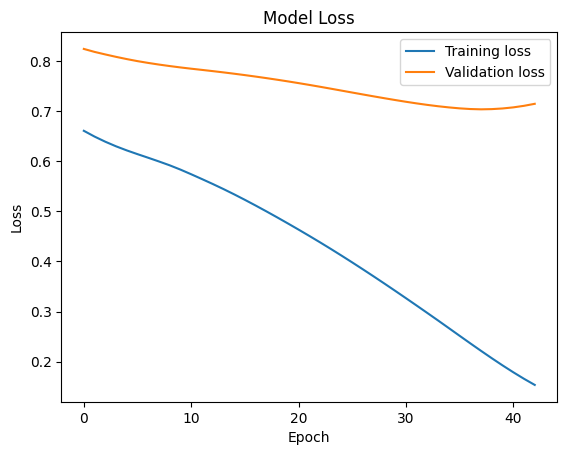

In [ ]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Training loss', 'Validation loss'], loc='upper right')
plt.show()

In [ ]:
# Retrieve loss values
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Create a table with loss values
loss_table = []

for epoch in range(len(train_loss)):
    loss_table.append([epoch+1, train_loss [epoch], val_loss [epoch]])

headers = ["Epoch", "Train Loss", "Validation Loss"]

# Print the loss table using tabulate
print(tabulate(loss_table, headers=headers, tablefmt='fancy_grid'))

╒═════════╤══════════════╤═══════════════════╕
│   Epoch │   Train Loss │   Validation Loss │
╞═════════╪══════════════╪═══════════════════╡
│       1 │     0.660963 │          0.824485 │
├─────────┼──────────────┼───────────────────┤
│       2 │     0.649402 │          0.818536 │
├─────────┼──────────────┼───────────────────┤
│       3 │     0.639148 │          0.813465 │
├─────────┼──────────────┼───────────────────┤
│       4 │     0.629968 │          0.808644 │
├─────────┼──────────────┼───────────────────┤
│       5 │     0.621794 │          0.804192 │
├─────────┼──────────────┼───────────────────┤
│       6 │     0.614316 │          0.800092 │
├─────────┼──────────────┼───────────────────┤
│       7 │     0.607089 │          0.796505 │
├─────────┼──────────────┼───────────────────┤
│       8 │     0.599684 │          0.793233 │
├─────────┼──────────────┼───────────────────┤
│       9 │     0.591992 │          0.790264 │
├─────────┼──────────────┼───────────────────┤
│      10 │  

In [ ]:
# Make predictions on the test set
pred3 = model3.predict(X_test3)

print("shape:", pred3.shape)

2/2 [==============================] - 0s 6ms/step
shape: (44, 2)


In [ ]:
# Inverse transform the scaled predictions to original scale
y_pred3 = scaler.inverse_transform(pred3)

In [ ]:
y_test3 = scaler.inverse_transform(y_test3)

In [ ]:
y_pred3 = pd.DataFrame(y_pred3, columns=['total_visitor','total_accomodation'])
y_pred3

,total_visitor,total_accomodation
0,16005.119141,32096.460938
1,16363.549805,31711.105469
2,16539.072266,31345.009766
3,16860.027344,30653.320312
4,16235.644531,32071.613281
5,16274.234375,32018.000000
6,16268.917969,32036.410156
7,16258.029297,32073.634766
8,16097.536133,32356.982422
9,16030.659180,31790.935547


In [ ]:
y_test3 = pd.DataFrame(y_test3, columns=['total_visitor','total_accomodation'])
y_test3

,total_visitor,total_accomodation
0,14529.0,41159.0
1,22485.0,41624.0
2,24913.0,41914.0
3,29180.0,42390.0
4,20462.0,42701.0
5,20895.0,43243.0
6,20780.0,43370.0
7,20546.0,43623.0
8,17047.0,44300.0
9,11700.0,44451.0


In [ ]:
a = y_test3['total_visitor']
b = y_pred3['total_visitor']
c = a - b

hasil_model3 = {'data aktual': a, 'data prediksi': b, 'loss (perbedaan)': c}
hasil_model3 = pd.DataFrame(hasil_model3)

hasil_model3

,data aktual,data prediksi,loss (perbedaan)
0,14529.0,16005.119141,-1476.119141
1,22485.0,16363.549805,6121.450195
2,24913.0,16539.072266,8373.927734
3,29180.0,16860.027344,12319.972656
4,20462.0,16235.644531,4226.355469
5,20895.0,16274.234375,4620.765625
6,20780.0,16268.917969,4511.082031
7,20546.0,16258.029297,4287.970703
8,17047.0,16097.536133,949.463867
9,11700.0,16030.659180,-4330.659180


In [ ]:
#calculate the accuration

gru_mse_3 =  round(sm.mean_squared_error(y_test3, y_pred3), 2)
gru_mae_3 = round(sm.mean_absolute_error(y_test3, y_pred3), 2)
gru_mape_3 = np.round(np.mean(np.abs((y_test3) - y_pred3 )/y_test3)*100,2)
gru_rmse_3 =  np.sqrt(mean_squared_error(y_test3, y_pred3)).round(2)



/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [ ]:
eror3 = pd.DataFrame({'Method':['MSE', 'MAE', 'MAPE', 'RMSE'], 'Eror': [gru_mse_3,gru_mae_3,gru_mape_3, gru_rmse_3]})

eror3 = eror3[['Method', 'Eror' ]]
eror3

,Method,Eror
0,MSE,341089601.26
1,MAE,16782.38
2,MAPE,total_visitor inf total_accomodation...
3,RMSE,18468.61


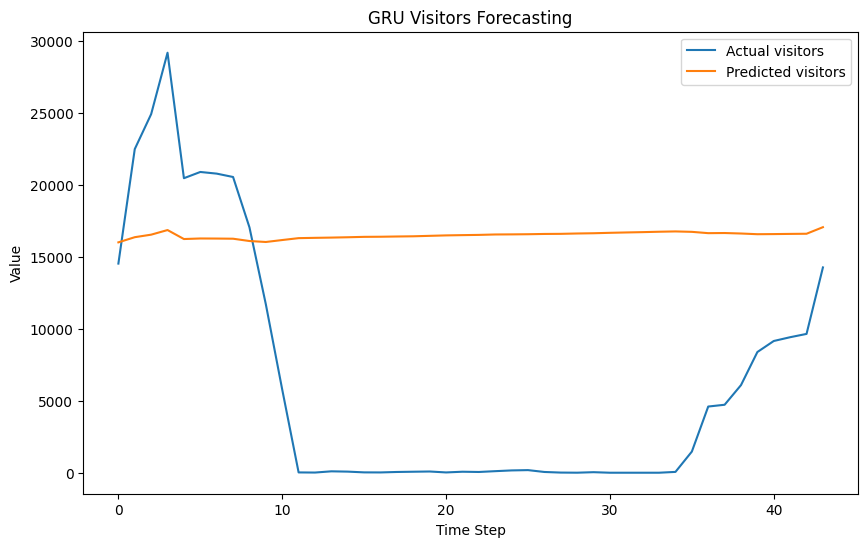

In [ ]:
# Plot the results for both targets (humidity and temperature)
plt.figure(figsize=(10, 6))

plt.plot(y_test3['total_visitor'], label='Actual visitors')
plt.plot(y_pred3['total_visitor'], label='Predicted visitors')

plt.title('GRU Visitors Forecasting')
plt.xlabel('Time Step')
plt.ylabel('Value')
plt.legend()

plt.show()

In [ ]:
n_past = 1
n_month_for_prediction3 = 12
predict_period_month = pd.date_range(list(train_dates)[-n_past],
                                     periods=n_month_for_prediction3, freq='M').tolist()
print(predict_period_month)

[Timestamp('2022-12-31 00:00:00', freq='M'), Timestamp('2023-01-31 00:00:00', freq='M'), Timestamp('2023-02-28 00:00:00', freq='M'), Timestamp('2023-03-31 00:00:00', freq='M'), Timestamp('2023-04-30 00:00:00', freq='M'), Timestamp('2023-05-31 00:00:00', freq='M'), Timestamp('2023-06-30 00:00:00', freq='M'), Timestamp('2023-07-31 00:00:00', freq='M'), Timestamp('2023-08-31 00:00:00', freq='M'), Timestamp('2023-09-30 00:00:00', freq='M'), Timestamp('2023-10-31 00:00:00', freq='M'), Timestamp('2023-11-30 00:00:00', freq='M')]


In [ ]:
prediction3 = model3.predict(X_train3[-n_month_for_prediction3:])

1/1 [==============================] - 0s 24ms/step


In [ ]:
prediction3

array([[ 0.22565986, -0.49228343],
       [ 0.24901155, -0.52836037],
       [ 0.29913133, -0.615602  ],
       [ 0.30585015, -0.62469274],
       [ 0.22881956, -0.48947343],
       [ 0.23750466, -0.50114447],
       [ 0.27066165, -0.5560634 ],
       [ 0.24289787, -0.507268  ],
       [ 0.16881077, -0.428274  ],
       [ 0.17785864, -0.3996586 ],
       [ 0.19639854, -0.4210966 ],
       [ 0.18302742, -0.3972834 ]], dtype=float32)

In [ ]:
#mengambil kolom total visitor saja
prediction3 = scaler.inverse_transform(prediction3)[:,0]
prediction3

array([16489.79 , 16707.84 , 17175.844, 17238.582, 16519.293, 16600.39 ,
       16910.002, 16650.752, 15958.947, 16043.434, 16216.554, 16091.698],
      dtype=float32)

<ipython-input-85-d22d11ce7ac2>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  original['datetime'] = pd.to_datetime(original['datetime'])


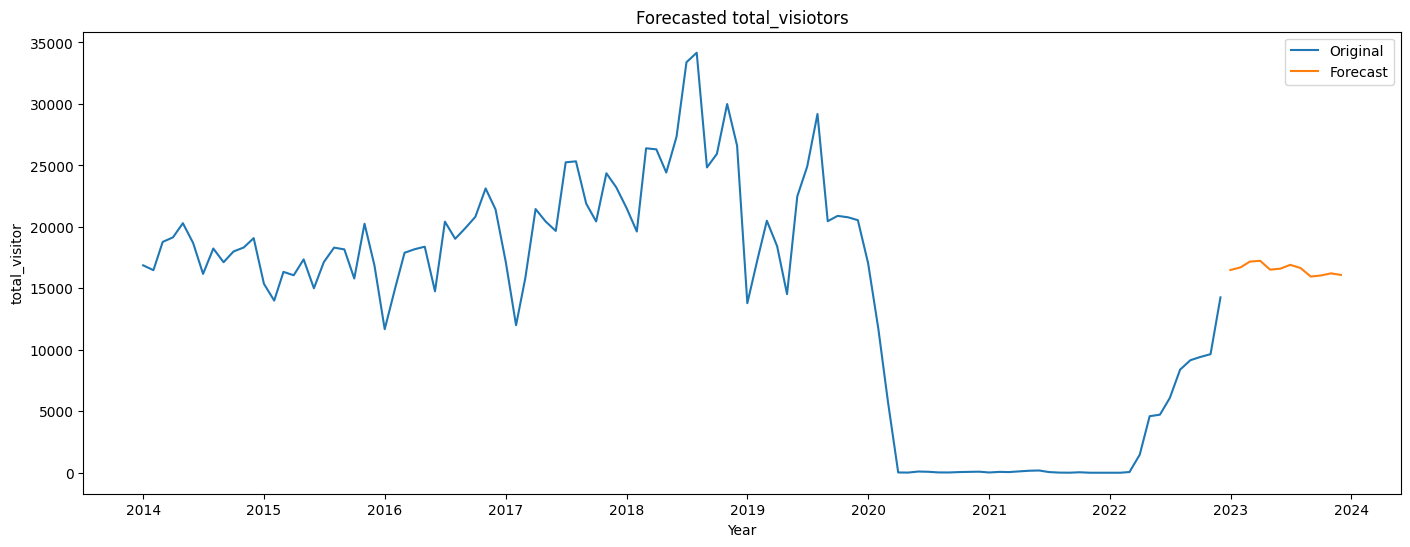

In [ ]:
forecast_dates = []

for time_i in predict_period_month:
    forecast_dates.append(time_i.date())

df_forecast = pd.DataFrame({'Date': forecast_dates, 'total_visitor': prediction3})
df_forecast['Date'] = pd.to_datetime(df_forecast['Date'])

# Assuming 'original' contains the original data with 'Datetime' and 'jumlah_penderita' columns
original = jatim[['datetime','total_visitor']]
original['datetime'] = pd.to_datetime(original['datetime'])
original = original.loc[original['datetime'] >= '2013-01-01']


#Plot
plt.figure(figsize=(17, 6))
sns.lineplot(data=original, x='datetime', y='total_visitor', label='Original')
sns.lineplot(data=df_forecast, x='Date', y='total_visitor', label='Forecast')
plt.xlabel('Year')
plt.ylabel('total_visitor')
plt.title('Forecasted total_visiotors')
plt.legend()
plt.show()

# Generate the forecast dates from January 2023 to December 2023
forecast_dates_1 = pd.date_range(start='2023-01-01', end='2023-12-01', freq='MS')

# Create a list of forecast dates and prediction values
data = list(zip(forecast_dates_1, prediction3))

In [ ]:
from tabulate import tabulate

In [ ]:
# Create a list of headers for the table
headers = ['Date', 'Prediction 3']
table = tabulate(data, headers=headers, tablefmt='fancy_grid')
# Print the table
print(table)

╒═════════════════════╤════════════════╕
│ Date                │   Prediction 3 │
╞═════════════════════╪════════════════╡
│ 2023-01-01 00:00:00 │        16489.8 │
├─────────────────────┼────────────────┤
│ 2023-02-01 00:00:00 │        16707.8 │
├─────────────────────┼────────────────┤
│ 2023-03-01 00:00:00 │        17175.8 │
├─────────────────────┼────────────────┤
│ 2023-04-01 00:00:00 │        17238.6 │
├─────────────────────┼────────────────┤
│ 2023-05-01 00:00:00 │        16519.3 │
├─────────────────────┼────────────────┤
│ 2023-06-01 00:00:00 │        16600.4 │
├─────────────────────┼────────────────┤
│ 2023-07-01 00:00:00 │        16910   │
├─────────────────────┼────────────────┤
│ 2023-08-01 00:00:00 │        16650.8 │
├─────────────────────┼────────────────┤
│ 2023-09-01 00:00:00 │        15958.9 │
├─────────────────────┼────────────────┤
│ 2023-10-01 00:00:00 │        16043.4 │
├─────────────────────┼────────────────┤
│ 2023-11-01 00:00:00 │        16216.6 │
├───────────────